In [1]:
import os
import sys
sys.path.append("/home/pervinco/BKAI-IGH-NeoPolyp")

import cv2
import yaml
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob

from data.data_preprocess import encode_mask

In [2]:
with open("/home/pervinco/BKAI-IGH-NeoPolyp/config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
data_dir = config["data_dir"]
image_dir = f"{data_dir}/train"
mask_dir = f"{data_dir}/train_gt"

color_dir = f"{data_dir}/color_txt"
color_files = sorted(glob(f"{color_dir}/*.txt"))

In [4]:
total = {}
for color_file in color_files:
    name = color_file.split('/')[-1].split('.')[0]
    with open(color_file, 'r') as f:
        files = [x.strip() for x in f.readlines()]

    total.update({name : files})

for name, files in total.items():
    print(name, len(files))

green 257
red 694
rng 49


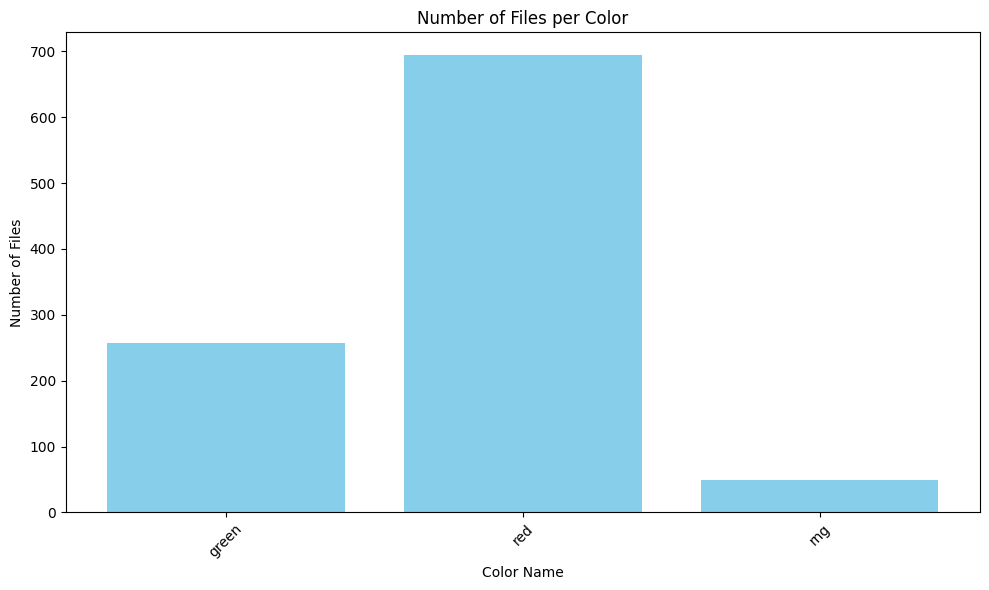

In [5]:
names = list(total.keys())
file_counts = [len(files) for files in total.values()]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(names, file_counts, color='skyblue')
plt.xlabel('Color Name')
plt.ylabel('Number of Files')
plt.title('Number of Files per Color')
plt.xticks(rotation=45)  # Rotate the x labels to show them better
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [6]:
class_dist = {}
for name, files in total.items():
    for file in files:
        mask_file = f"{mask_dir}/{file}.jpeg"
        mask = cv2.imread(mask_file)
        encoded_mask = encode_mask(mask)

        unique_labels, label_counts = np.unique(encoded_mask, return_counts=True)
        for label, count in zip(unique_labels, label_counts):
            if label not in class_dist:
                class_dist[label] = 0
            class_dist[label] += count

In [7]:
for label, count in class_dist.items():
    print(f"Class {label}: {count}")

Class 0: 1190864392
Class 1: 8581706
Class 2: 58717102


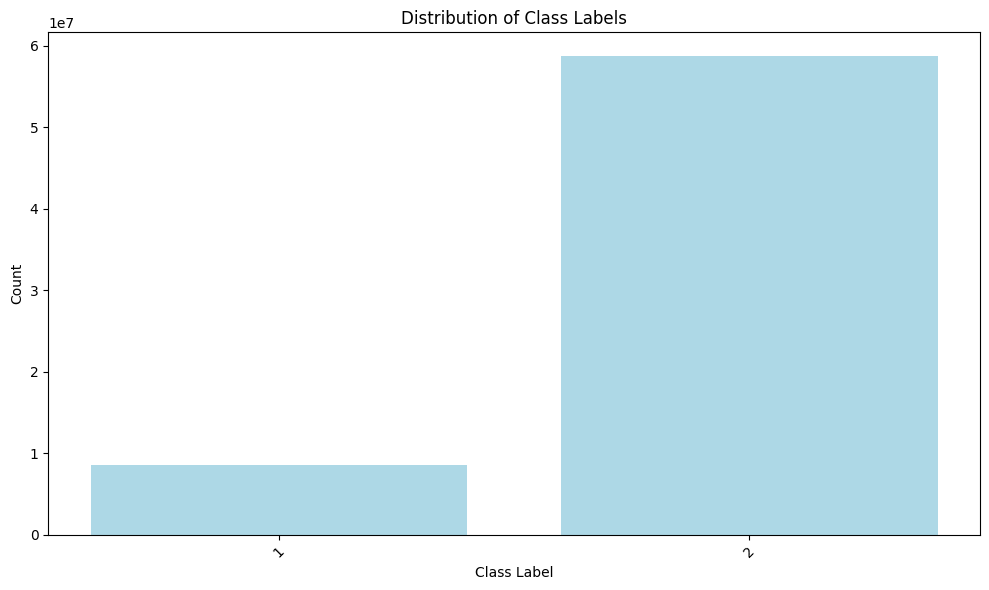

In [11]:
labels = list(class_dist.keys())[1:]
counts = list(class_dist.values())[1:]


plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='lightblue')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.xticks(labels, rotation=45)  # Set x-ticks to be the class labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [8]:
total_samples = sum(class_dist.values())
class_weights = [total_samples / (class_dist[i] * len(class_dist)) for i in range(len(class_dist))]
print(class_weights)

[0.3521708568588499, 48.86997216326606, 7.142514174717501]


In [9]:
total_weight = sum(class_weights)
normalized_weights = [weight / total_weight for weight in class_weights]

print("Normalized Class Weights:", normalized_weights)

Normalized Class Weights: [0.006248079459464449, 0.867032189947176, 0.12671973059335967]
